In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from imblearn.over_sampling import SMOTE,RandomOverSampler
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [6]:
df=pd.read_csv("D:/first inten project.csv")

In [7]:
df.shape

(36285, 17)

In [8]:
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [9]:
df.isnull().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [11]:
df['date of reservation'][2]

'2/28/2018'

In [12]:
df.shape[0]

36285

In [13]:
df['date of reservation'][0]

'10/2/2015'

In [14]:
df['date of reservation'][3677]

'2018-2-29'

In [15]:
df.loc[df['date of reservation']=='2018-2-29']

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
2626,INN02627,2,0,1,5,Meal Plan 1,0,Room_Type 1,104,Online,1,1,0,61.43,0,2018-2-29,Canceled
3677,INN03678,1,0,1,3,Meal Plan 1,0,Room_Type 1,21,Online,0,0,0,102.05,0,2018-2-29,Canceled
5600,INN05601,2,0,1,3,Meal Plan 1,0,Room_Type 1,24,Offline,0,0,0,45.50,0,2018-2-29,Not_Canceled
6343,INN06344,1,0,1,1,Meal Plan 1,0,Room_Type 1,117,Offline,0,0,0,76.00,0,2018-2-29,Not_Canceled
7648,INN07649,2,1,1,5,Meal Plan 1,0,Room_Type 1,35,Online,0,0,0,98.10,1,2018-2-29,Canceled
8000,INN08001,2,2,1,3,Meal Plan 1,0,Room_Type 6,3,Online,0,0,0,183.00,1,2018-2-29,Not_Canceled
8989,INN08990,1,0,1,2,Meal Plan 1,0,Room_Type 1,117,Offline,0,0,0,76.00,0,2018-2-29,Not_Canceled
9153,INN09154,2,2,1,3,Meal Plan 1,0,Room_Type 6,3,Online,0,0,0,189.75,0,2018-2-29,Not_Canceled
9245,INN09246,2,0,1,3,Meal Plan 1,0,Room_Type 4,15,Online,0,0,0,85.55,1,2018-2-29,Not_Canceled
9664,INN09665,1,0,1,0,Meal Plan 1,0,Room_Type 4,21,Online,0,0,0,117.00,0,2018-2-29,Not_Canceled


In [16]:
df.replace('2018-2-29','2-29-2018',inplace=True)

In [17]:
day=[]
month=[]
year=[]

In [18]:
count=0

In [19]:
df['date of reservation'][35481]

'2-29-2018'

In [20]:
#(\d+)[-/](\d+)[-/](\d+)

In [21]:
for i in range(df.shape[0]):
    match=re.match(r"(\d+)[-/](\d+)[-/](\d+)", df['date of reservation'].iloc[i])
    if match:
        month.append(match.group(1))
        day.append(match.group(2))
        year.append(match.group(3))
        if(int(match.group(1))>12):
            print(df['date of reservation'][i])
    else:
        print(i)
        

In [22]:
df["month"]=month
df["day"]=day
df["year"]=year

In [23]:
df['year'].unique()

array(['2015', '2018', '2017', '2016'], dtype=object)

In [24]:
df['month'].unique()

array(['10', '11', '2', '5', '4', '9', '12', '7', '6', '8', '3', '1'],
      dtype=object)

In [25]:
df['day'].unique()

array(['2', '6', '28', '20', '11', '13', '15', '26', '18', '30', '5',
       '10', '4', '25', '22', '21', '19', '17', '7', '9', '27', '1', '29',
       '16', '3', '24', '14', '31', '23', '8', '12'], dtype=object)

In [26]:
df['month'] = df['month'].astype(int)

In [27]:
season_dict = {1: 'Winter', 2: 'Winter',3: 'Spring', 4: 'Spring', 5: 'Spring',6: 'Summer', 7: 'Summer', 8: 'Summer',9: 'Autumn', 10: 'Autumn', 11: 'Autumn',12: 'Winter'}
df['season'] = df['month'].map(season_dict)


In [28]:
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,...,P-C,P-not-C,average price,special requests,date of reservation,booking status,month,day,year,season
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,...,0,0,88.00,0,10/2/2015,Not_Canceled,10,2,2015,Autumn
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,...,0,0,106.68,1,11/6/2018,Not_Canceled,11,6,2018,Autumn
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,...,0,0,50.00,0,2/28/2018,Canceled,2,28,2018,Winter
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,...,0,0,100.00,1,5/20/2017,Canceled,5,20,2017,Spring
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,...,0,0,77.00,0,4/11/2018,Canceled,4,11,2018,Spring


# exploratory data analysis

In [31]:
test=df.groupby('season').sum()['booking status'].sort_values(ascending = False).head(10)

Text(0.5, 1.0, 'Frequency canceled and not canceled reservations for each month')

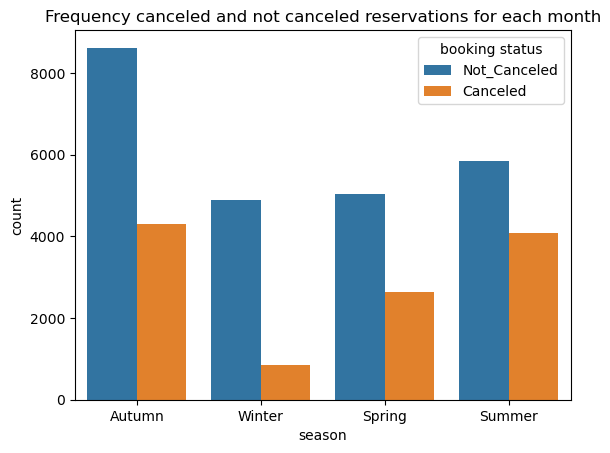

In [26]:
sns.countplot(data=df,x=df['season'],hue=df['booking status'])
plt.title('Frequency canceled and not canceled reservations for each month')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

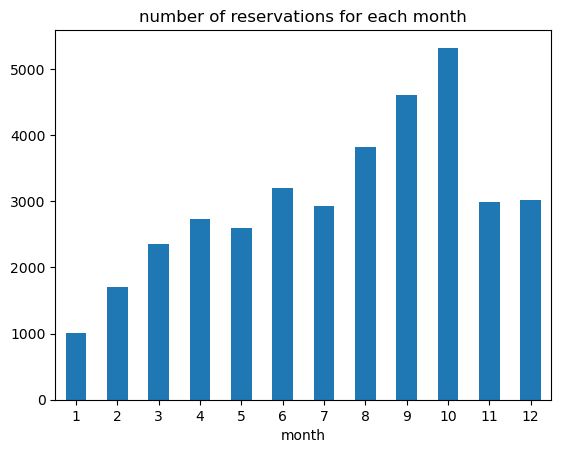

In [27]:
df.groupby('month')['Booking_ID'].count().plot(kind='bar')
plt.title('number of reservations for each month')
plt.xticks(rotation=0)

In [28]:
df['year'].value_counts()

year
2018    29767
2017     6516
2015        1
2016        1
Name: count, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, '2015'),
  Text(1, 0, '2016'),
  Text(2, 0, '2017'),
  Text(3, 0, '2018')])

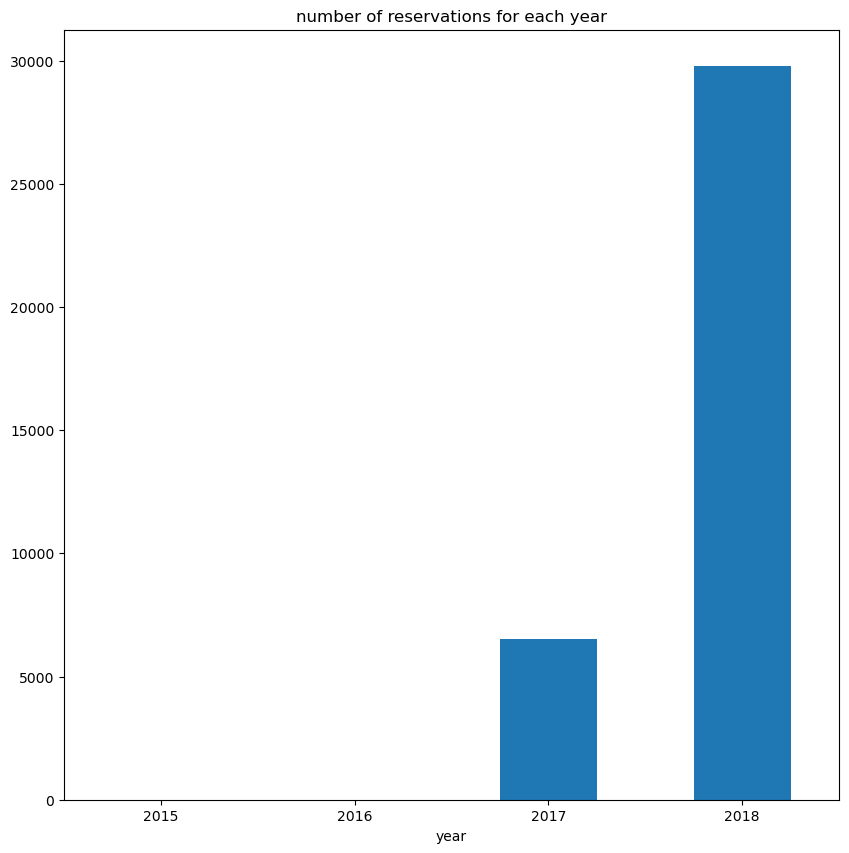

In [29]:
plt.figure(figsize=(10, 10))
df.groupby('year')['Booking_ID'].count().plot(kind='bar')
plt.title('number of reservations for each year')
plt.xticks(rotation=0)

Text(0.5, 1.0, 'Correlation between features')

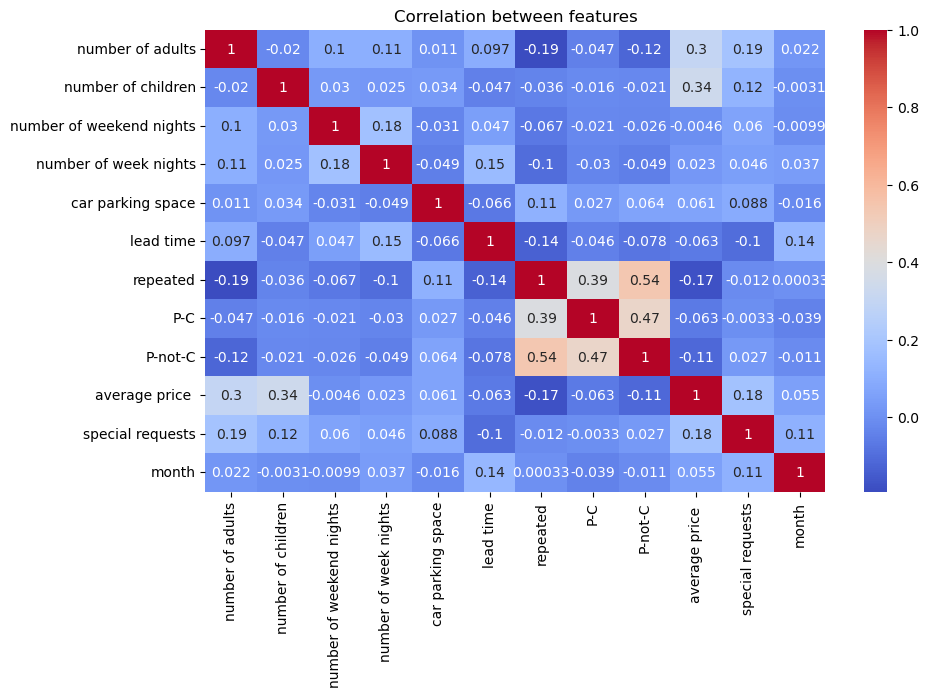

In [30]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm',)
plt.title("Correlation between features")

<Axes: xlabel='lead time', ylabel='Count'>

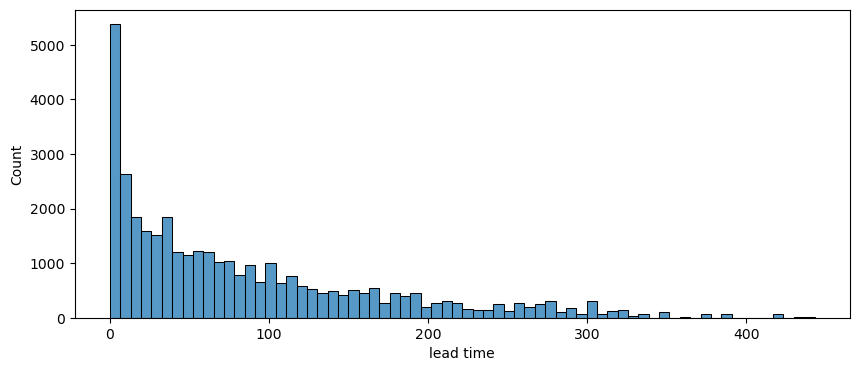

In [120]:
plt.figure(figsize=(10,4))
sns.histplot(df['lead time'] )

<Axes: xlabel='average price ', ylabel='Count'>

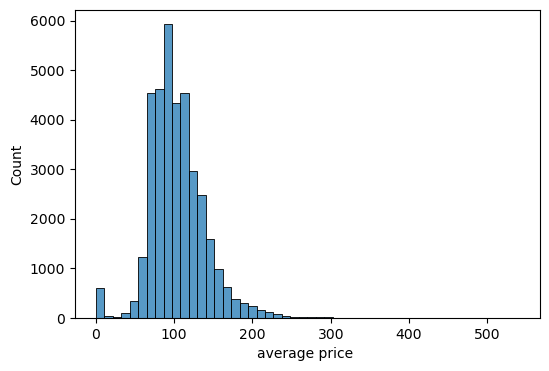

In [32]:
plt.figure(figsize=(6,4))
sns.histplot(df['average price '],bins=50 )

<Axes: xlabel='room type', ylabel='count'>

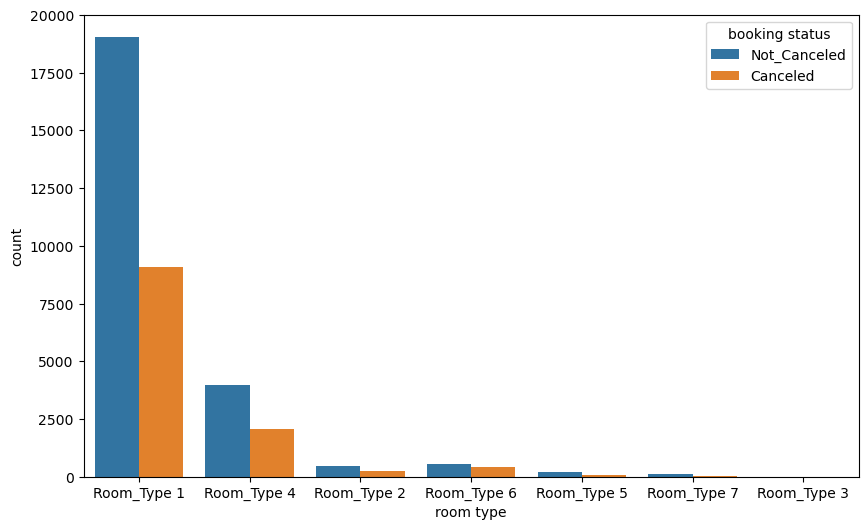

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="room type", hue="booking status")


In [34]:
df['room type'].value_counts()

room type
Room_Type 1    28138
Room_Type 4     6059
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64

<Axes: xlabel='average price ', ylabel='Density'>

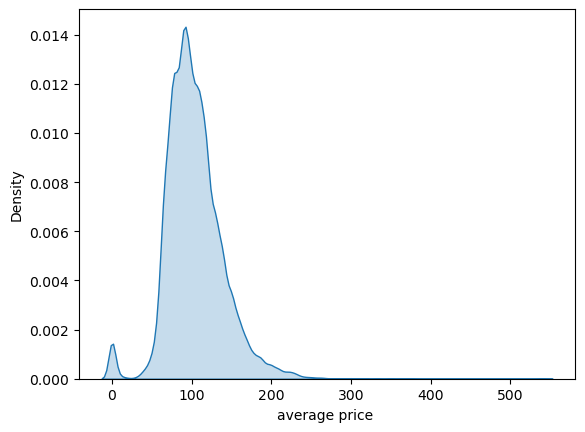

In [100]:
sns.kdeplot(data=df['average price '], fill=True)

Text(0.5, 1.0, 'relationship between number of adults with average price')

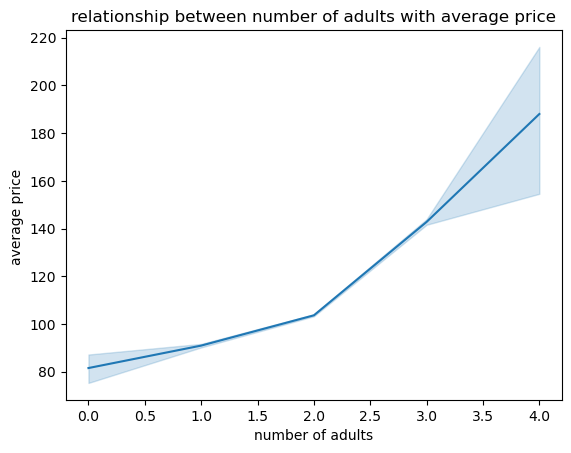

In [37]:
sns.lineplot(data=df, x="number of adults", y="average price ")
plt.title("relationship between number of adults with average price")

Text(0.5, 1.0, 'relationship between number of childern with average price')

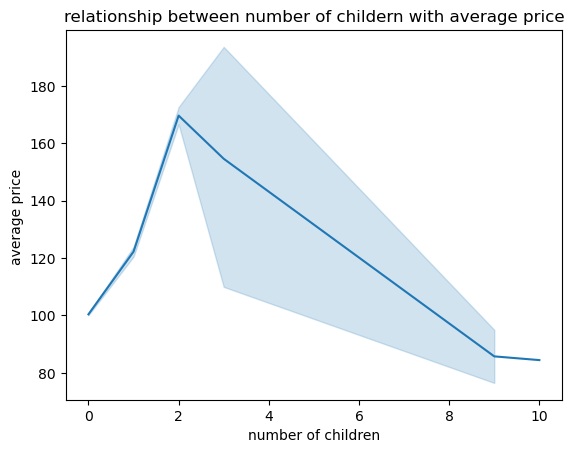

In [38]:
sns.lineplot(data=df, x="number of children", y="average price ")
plt.title("relationship between number of childern with average price")

In [39]:
df['total number of guests']=df['number of children']+df['number of adults']

Text(0.5, 1.0, 'relationship between total number of guests with average price')

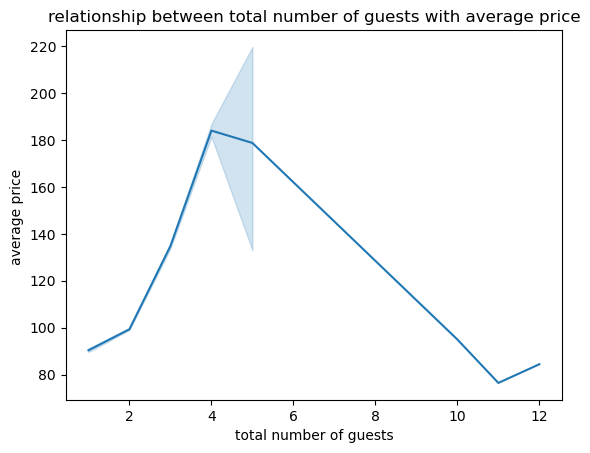

In [82]:
sns.lineplot(data=df, x="total number of guests", y="average price ")
plt.title("relationship between total number of guests with average price")

Text(0.5, 1.0, 'Frequency canceled and not canceled reservations for each Market segement type')

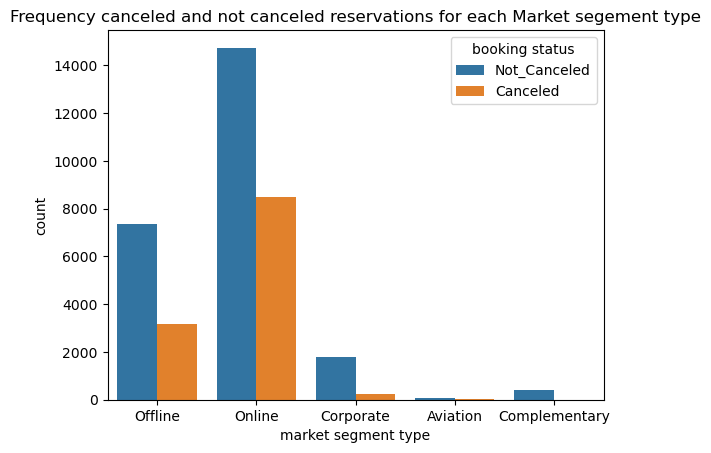

In [88]:
sns.countplot(data=df,x=df['market segment type'],hue=df['booking status'])
plt.title('Frequency canceled and not canceled reservations for each Market segement type')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Aviation'),
  Text(1, 0, 'Complementary'),
  Text(2, 0, 'Corporate'),
  Text(3, 0, 'Offline'),
  Text(4, 0, 'Online')])

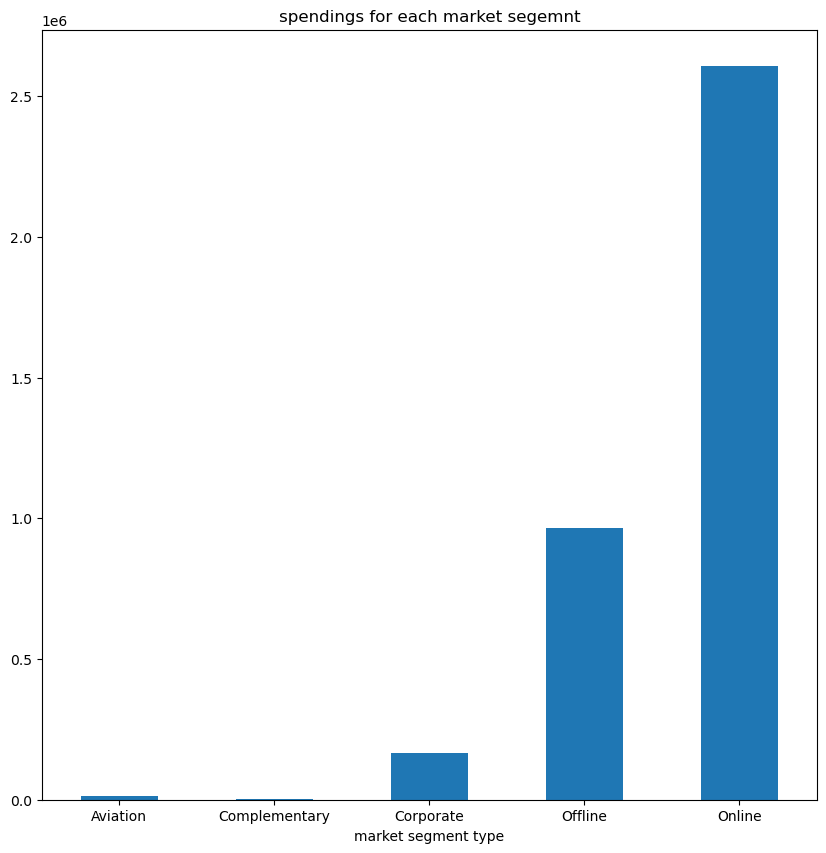

In [118]:
plt.figure(figsize=(10, 10))
df.groupby('market segment type')["average price "].sum().plot(kind='bar')
plt.title('spendings for each market segemnt')
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Aviation'),
  Text(1, 0, 'Complementary'),
  Text(2, 0, 'Corporate'),
  Text(3, 0, 'Offline'),
  Text(4, 0, 'Online')])

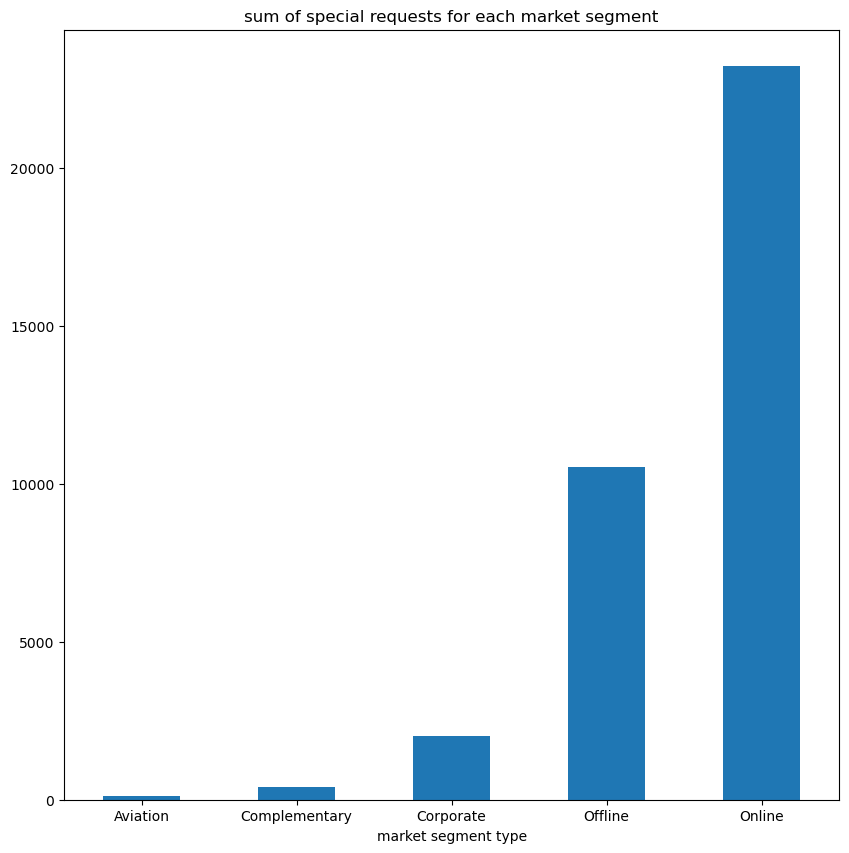

In [116]:
plt.figure(figsize=(10, 10))
df.groupby('market segment type')['special requests'].count().plot(kind='bar')
plt.title('sum of special requests for each market segment')
plt.xticks(rotation=0)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Autumn'),
  Text(1, 0, 'Spring'),
  Text(2, 0, 'Summer'),
  Text(3, 0, 'Winter')])

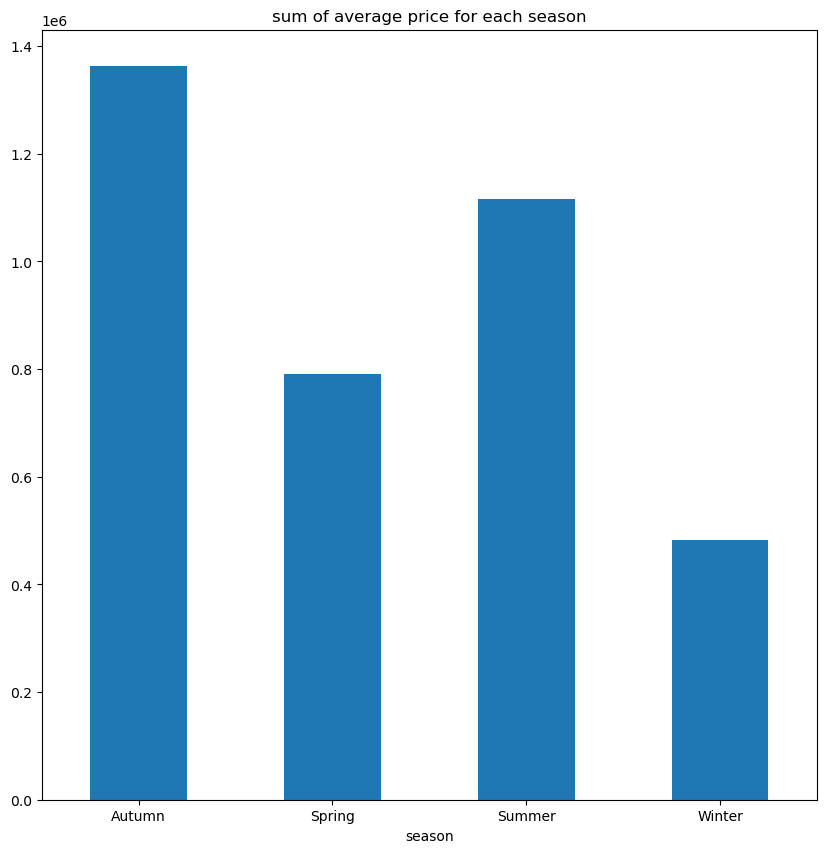

In [114]:
plt.figure(figsize=(10, 10))
df.groupby('season')["average price "].sum().plot(kind='bar')
plt.title('sum of average price for each season')
plt.xticks(rotation=0)

Text(0.5, 1.0, 'Frequency canceled and not canceled reservations for each Market segement type')

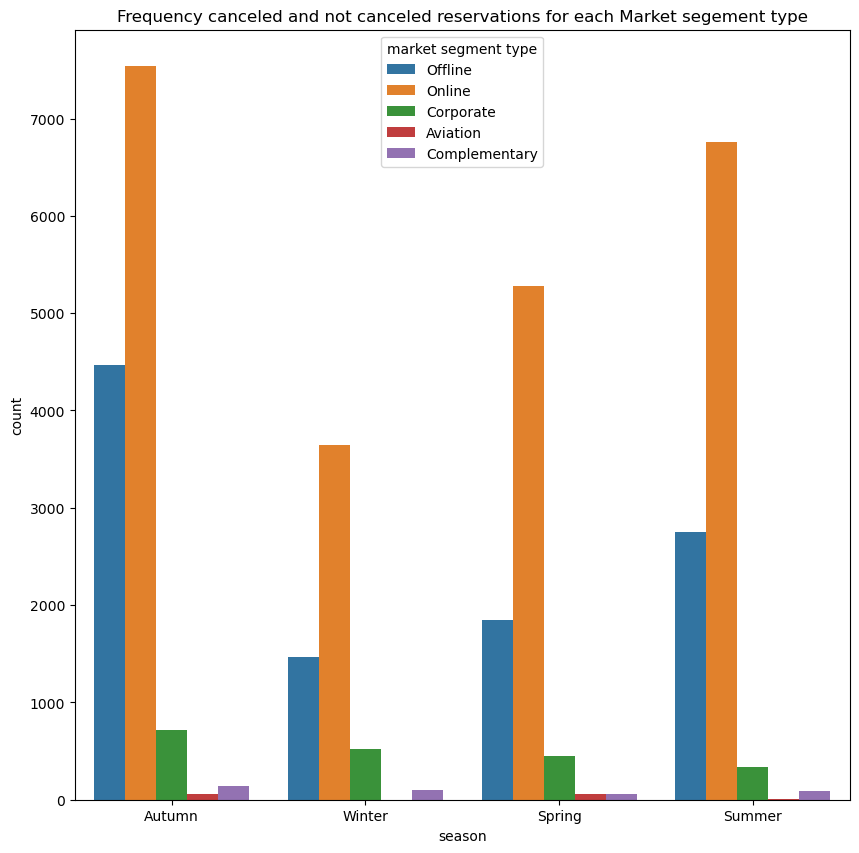

In [126]:
plt.figure(figsize=(10, 10))
sns.countplot(data=df,x=df['season'],hue=df['market segment type'])
plt.title('Frequency canceled and not canceled reservations for each Market segement type')

# preprocessing

In [56]:
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,...,P-C,P-not-C,average price,special requests,date of reservation,booking status,month,day,year,season
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,...,0,0,88.00,0,10/2/2015,Not_Canceled,10,2,2015,Autumn
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,...,0,0,106.68,1,11/6/2018,Not_Canceled,11,6,2018,Autumn
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,...,0,0,50.00,0,2/28/2018,Canceled,2,28,2018,Winter
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,...,0,0,100.00,1,5/20/2017,Canceled,5,20,2017,Spring
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,...,0,0,77.00,0,4/11/2018,Canceled,4,11,2018,Spring


In [58]:
df.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price ', 'special requests',
       'date of reservation', 'booking status', 'month', 'day', 'year',
       'season'],
      dtype='object')

In [60]:
df.drop(['Booking_ID','date of reservation'],axis=1,inplace=True)

In [62]:
df.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status,month,day,year,season
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,Not_Canceled,10,2,2015,Autumn
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled,11,6,2018,Autumn
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,Canceled,2,28,2018,Winter
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,Canceled,5,20,2017,Spring
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,Canceled,4,11,2018,Spring


In [64]:
df['type of meal'].value_counts()

type of meal
Meal Plan 1     27842
Not Selected     5132
Meal Plan 2      3306
Meal Plan 3         5
Name: count, dtype: int64

In [66]:
LE=LabelEncoder()

In [68]:
df['type of meal']=LE.fit_transform(df['type of meal'])

In [70]:
df['room type'].value_counts()

room type
Room_Type 1    28138
Room_Type 4     6059
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64

In [72]:
df['room type']=LE.fit_transform(df['room type'])

In [74]:
df['room type'].value_counts()

room type
0    28138
3     6059
5      966
1      692
4      265
6      158
2        7
Name: count, dtype: int64

In [76]:
df['market segment type'].value_counts()

market segment type
Online           23221
Offline          10531
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

In [78]:
df['market segment type']=LE.fit_transform(df['market segment type'])

In [80]:
df['market segment type'].value_counts()

market segment type
4    23221
3    10531
2     2017
1      391
0      125
Name: count, dtype: int64

In [82]:
df['season']=LE.fit_transform(df['season'])

In [84]:
df['season'].value_counts()

season
0    12913
2     9937
1     7694
3     5741
Name: count, dtype: int64

In [86]:
df['booking status'].value_counts()

booking status
Not_Canceled    24396
Canceled        11889
Name: count, dtype: int64

In [88]:
test=pd.get_dummies(df['booking status'],dtype= int)

In [90]:
test.head()

,Canceled,Not_Canceled
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0


In [92]:
df['booking status']=test['Canceled']

In [94]:
df.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status,month,day,year,season
0,1,1,2,5,0,0,0,224,3,0,0,0,88.00,0,0,10,2,2015,0
1,1,0,1,3,3,0,0,5,4,0,0,0,106.68,1,0,11,6,2018,0
2,2,1,1,3,0,0,0,1,4,0,0,0,50.00,0,1,2,28,2018,3
3,1,0,0,2,0,0,0,211,4,0,0,0,100.00,1,1,5,20,2017,1
4,1,0,1,2,3,0,0,48,4,0,0,0,77.00,0,1,4,11,2018,1


# Outliers detection and handling

<Axes: ylabel='lead time'>

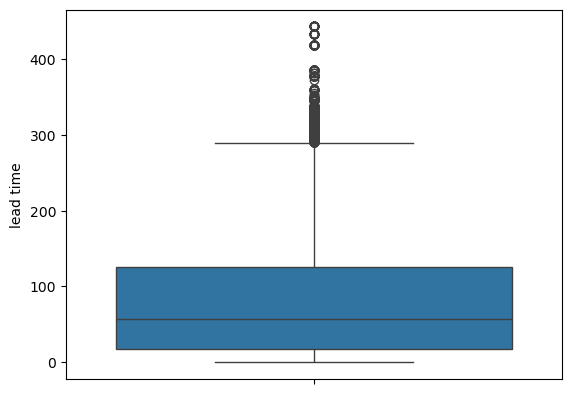

In [97]:
sns.boxplot(df['lead time'])

In [98]:
Q1=df['lead time'].quantile(0.25)
Q3=df['lead time'].quantile(0.75)
IQR=Q3 - Q1
print("interquartile range:",IQR)

interquartile range: 109.0


In [99]:
lower_bound=Q1-1.5*IQR
print('lower_bound: ',lower_bound)
upper_bound=Q3-1.5 *IQR
print('upper_bound: ',upper_bound)

lower_bound:  -146.5
upper_bound:  -37.5


In [100]:
Q1=df['lead time'].quantile(0.25)
print('Q1: ',Q1)
Q3=df['lead time'].quantile(0.75)
print('Q3: ',Q3)
IQR = Q3 - Q1
print('IQR: ',IQR)



Q1:  17.0
Q3:  126.0
IQR:  109.0


In [101]:
lower_bound = Q1 - 1.5 * IQR
print('lower_bound: ',lower_bound)
upper_bound = Q3 + 1.5 * IQR
print('upper_bound: ',upper_bound)

lower_bound:  -146.5
upper_bound:  289.5


In [102]:
filter_lower=(df['lead time'] < lower_bound)
filter_upper=(df['lead time'] > upper_bound)


In [103]:
print(df['lead time'][(filter_lower | filter_upper)])

5        346
96       320
118      443
120      317
170      317
        ... 
36171    315
36178    386
36191    304
36248    292
36280    346
Name: lead time, Length: 1332, dtype: int64


In [111]:
df.shape

(36285, 19)

In [113]:
df=df[~(filter_lower | filter_upper)]

In [115]:
df.shape

(34953, 19)

<Axes: ylabel='lead time'>

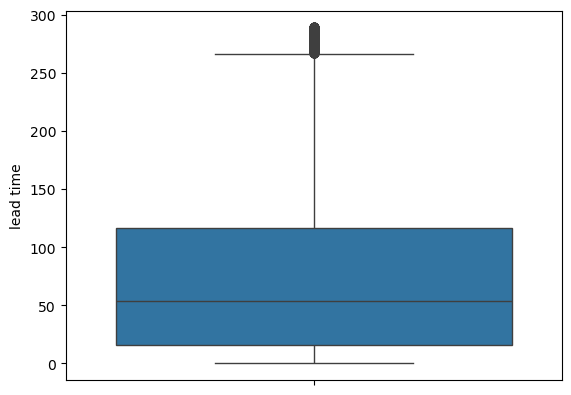

In [117]:
sns.boxplot(df['lead time'])

<Axes: ylabel='average price '>

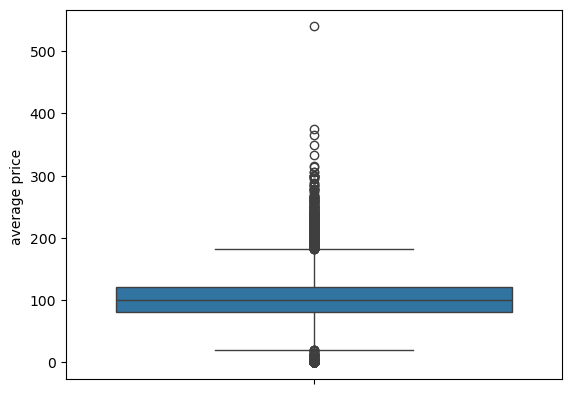

In [118]:
sns.boxplot(df['average price '])

In [121]:
Q1=df['average price '].quantile(0.25)
Q3=df['average price '].quantile(0.75)
IQR=Q3 - Q1
print("interquartile range:",IQR)

interquartile range: 40.75


In [123]:
lower_bound = Q1 - 1.5 * IQR
print('lower_bound: ',lower_bound)
upper_bound = Q3 + 1.5 * IQR
print('upper_bound: ',upper_bound)

lower_bound:  19.625
upper_bound:  182.625


In [125]:
filter_lower=(df['average price '] < lower_bound)
filter_upper=(df['average price ']> upper_bound)


In [127]:
print(df['average price '][(filter_lower | filter_upper)])

60       258.00
63         0.00
114      184.24
127      190.80
145        0.00
          ...  
36221    207.90
36227    231.00
36250      0.00
36263      1.00
36269    216.00
Name: average price , Length: 1608, dtype: float64


In [129]:
df=df[~(filter_lower | filter_upper)]

In [131]:
df.shape

(33345, 19)

<Axes: ylabel='average price '>

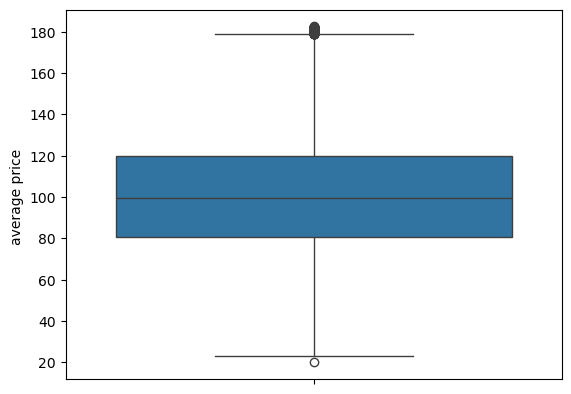

In [133]:
sns.boxplot(df['average price '])

#  Train Test Split

In [136]:
y=df['booking status']

In [138]:
df.drop('booking status',axis=1,inplace=True)

In [140]:
x=df

In [142]:
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)

In [144]:
X_train.shape

(23341, 18)

In [146]:
X_test.shape

(10004, 18)

In [148]:
y_train.shape

(23341,)

In [150]:
y_test.shape

(10004,)

In [152]:
y.head()

0    0
1    0
2    1
3    1
4    1
Name: booking status, dtype: int32

In [154]:
x.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,month,day,year,season
0,1,1,2,5,0,0,0,224,3,0,0,0,88.00,0,10,2,2015,0
1,1,0,1,3,3,0,0,5,4,0,0,0,106.68,1,11,6,2018,0
2,2,1,1,3,0,0,0,1,4,0,0,0,50.00,0,2,28,2018,3
3,1,0,0,2,0,0,0,211,4,0,0,0,100.00,1,5,20,2017,1
4,1,0,1,2,3,0,0,48,4,0,0,0,77.00,0,4,11,2018,1


# Feature Selection 

In [157]:
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


In [153]:
df.columns

Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'type of meal', 'car parking space',
       'room type', 'lead time', 'market segment type', 'repeated', 'P-C',
       'P-not-C', 'average price ', 'special requests', 'month', 'day', 'year',
       'season'],
      dtype='object')

In [155]:
LG=LogisticRegression()

In [80]:
sfs = SFS(LG,
         k_features = (1, 7),
          forward= True,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:    5.9s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    6.0s finished

[2025-02-13 04:31:38] Features: 1/7 -- score: 0.7535239417544267[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  17 | elapsed:    0.9s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    1.2s finished

[2025-02-13 04:31:39] Features: 2/7 -- score: 0.758193830451654[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  16 | elapsed:    1.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    1.4s finished

[2025-02-13 04:31:41] Features: 3/7 -- score: 0.758193830451654[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | el

In [81]:
df_= pd.DataFrame.from_dict(sfs.get_metric_dict()).T    #needed traspose to make it from row to table
df_= df_[["feature_idx","avg_score"]]
df_

,feature_idx,avg_score
1,"(7,)",0.753524
2,"(7, 17)",0.758194
3,"(7, 9, 17)",0.758194
4,"(7, 9, 12, 17)",0.758451
5,"(7, 9, 12, 13, 17)",0.777773
6,"(7, 8, 9, 12, 13, 17)",0.797652
7,"(7, 8, 9, 12, 13, 14, 17)",0.798338


In [377]:
fs_LG=sfs.k_feature_names_

In [378]:
fs_LG

('lead time',
 'market segment type',
 'repeated',
 'average price ',
 'special requests',
 'month',
 'season')

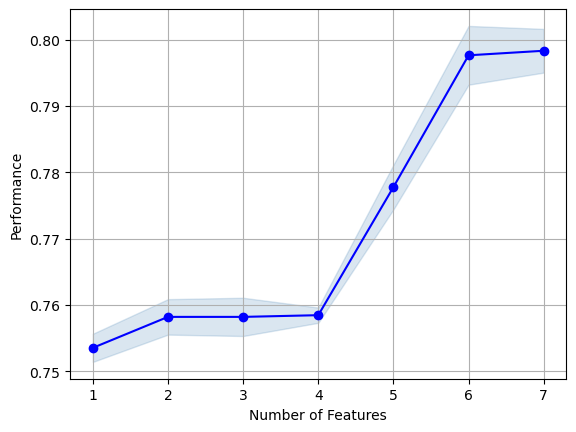

In [379]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

plot_sfs(sfs.get_metric_dict())   #may test standard deviation of cross validation score
plt.grid()

In [150]:
rfc=RandomForestClassifier() 

In [456]:
sfs = SFS(rfc,
         k_features = (1, 7),
          forward= True,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:    6.8s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   10.9s finished

[2025-02-12 21:41:04] Features: 1/7 -- score: 0.7641061331933166[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  17 | elapsed:   17.4s remaining:    9.5s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:   23.6s finished

[2025-02-12 21:41:27] Features: 2/7 -- score: 0.7956817243443026[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  16 | elapsed:   30.6s remaining:   18.3s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:   31.6s finished

[2025-02-12 21:41:59] Features: 3/7 -- score: 0.8392102354384599[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | 

In [457]:
df_= pd.DataFrame.from_dict(sfs.get_metric_dict()).T    #needed traspose to make it from row to table
df_= df_[["feature_idx","avg_score"]]
df_

,feature_idx,avg_score
1,"(7,)",0.764106
2,"(7, 12)",0.795682
3,"(7, 12, 13)",0.83921
4,"(7, 12, 13, 14)",0.857247
5,"(7, 8, 12, 13, 14)",0.869629
6,"(7, 8, 12, 13, 14, 15)",0.879311
7,"(2, 7, 8, 12, 13, 14, 15)",0.883681


In [383]:
fs_rfc=sfs.k_feature_names_

In [384]:
fs_rfc

('car parking space',
 'lead time',
 'market segment type',
 'average price ',
 'special requests',
 'month',
 'day')

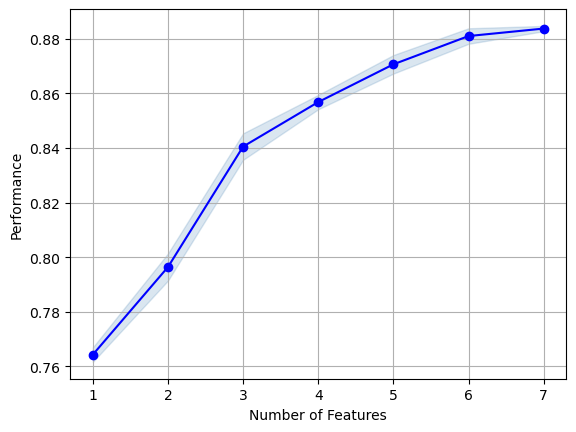

In [385]:
plot_sfs(sfs.get_metric_dict())   #may test standard deviation of cross validation score
plt.grid()

In [209]:
rfc = RandomForestClassifier()
#using random forest classifier for feature selection

selector = SelectFromModel(rfc)
selector.fit(X_train, y_train)

feature_ps = selector.get_support()
features_rfc = [X_train.columns[i] for i in range(len(X_train.columns)) if feature_ps[i]]

print(features_rfc)

['lead time', 'average price ', 'special requests', 'month', 'day']


# handling imblanced classes 

<Axes: title={'center': 'Target class distrubution'}>

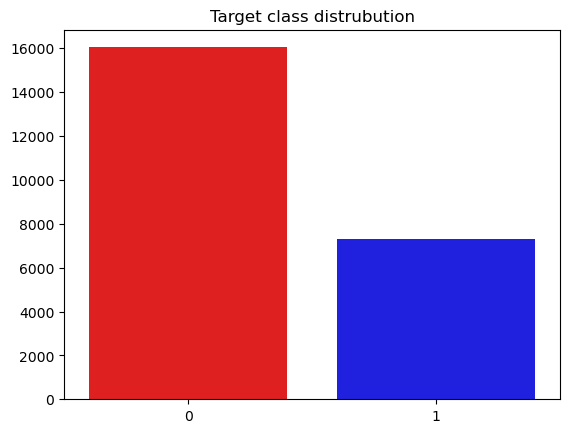

In [152]:
unique, counts = np.unique(y_train, return_counts=True) 
plt.title('Target class distrubution')
sns.barplot(x=unique, y=counts,palette=['red', 'blue'])

In [153]:
overSampler = RandomOverSampler(random_state=42) 
X_train_ros,y_train_ros=overSampler.fit_resample(X_train,y_train) #oversampling using Randomoversampling duplicate data

<Axes: title={'center': 'Target class distrubution'}>

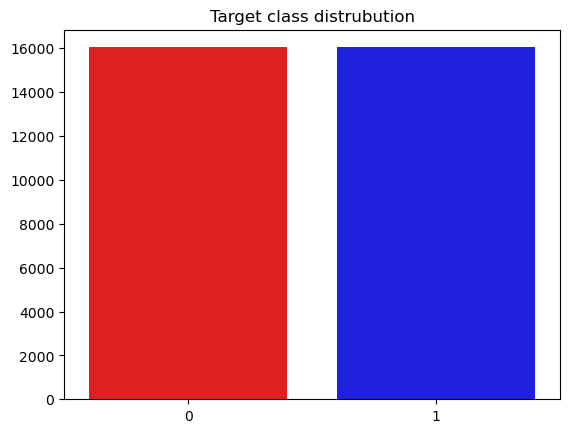

In [156]:
unique, counts = np.unique(y_train_ros, return_counts=True) 
plt.title('Target class distrubution')
sns.barplot(x=unique, y=counts,palette=['red', 'blue'])

In [175]:
smote=SMOTE(random_state=42)

In [177]:
X_train_smote,y_train_smote=smote.fit_resample(X_train,y_train) #oversampling using smote create new synthatic data

<Axes: title={'center': 'Target class distrubution'}>

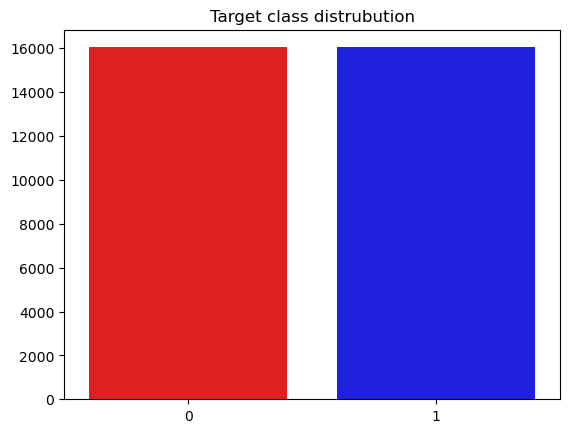

In [179]:
unique, counts = np.unique(y_train_smote, return_counts=True) 
plt.title('Target class distrubution')
sns.barplot(x=unique, y=counts,palette=['red', 'blue'])

# Modeling

## logistic regression

In [166]:
LG=LogisticRegression(solver='liblinear')

In [190]:
LG.fit(X_train_smote,y_train_smote)

LogisticRegression(solver='liblinear')

In [192]:
y_pred = LG.predict(X_test)

In [194]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      6874
           1       0.60      0.74      0.66      3130

    accuracy                           0.77     10004
   macro avg       0.73      0.76      0.74     10004
weighted avg       0.78      0.77      0.77     10004



In [168]:
param_grid = {
    'penalty': ['l1', 'l2'],  
    'C': [0.01, 0.1, 1, 10, 100],  
}

In [170]:
model_lr=LogisticRegression(solver='liblinear')

In [172]:
gs = GridSearchCV(estimator=model_lr, param_grid=param_grid, cv=4, n_jobs=-1, verbose=2, scoring='accuracy',refit=True)

In [174]:
gs.fit(X_train_smote,y_train_smote)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


GridSearchCV(cv=4, estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=2)

In [175]:
 best_lg=gs.best_estimator_

In [176]:
gs.best_score_

0.7872512650258126

In [177]:
y_pred = best_lg.predict(X_test)

In [178]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      6874
           1       0.60      0.74      0.66      3130

    accuracy                           0.77     10004
   macro avg       0.73      0.76      0.74     10004
weighted avg       0.78      0.77      0.77     10004



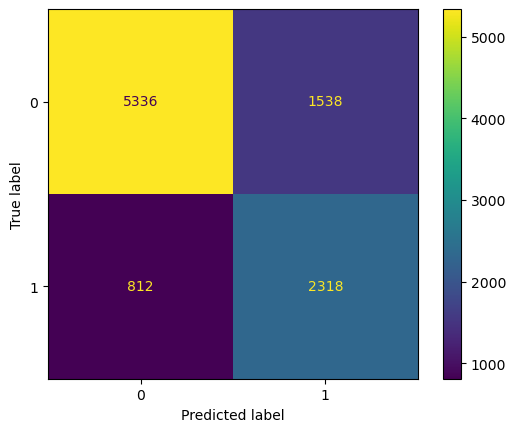

In [179]:
confusion = confusion_matrix(y_test, y_pred)
cm=ConfusionMatrixDisplay(confusion)
cm.plot()
plt.show()

## Support vector machine

In [180]:
svc=SVC()

In [181]:
svc.fit(X_train_smote,y_train_smote)

SVC()

In [182]:
y_pred = svc.predict(X_test)

In [183]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      6874
           1       0.54      0.57      0.56      3130

    accuracy                           0.72     10004
   macro avg       0.67      0.68      0.67     10004
weighted avg       0.72      0.72      0.72     10004



## SVC with grid search 

In [184]:
param_grid = {'C': [0.1, 100, 1000],  
              'gamma': [1, 0.1, 0.0001], 
              'kernel': ['rbf']} 

In [185]:
gs=GridSearchCV(SVC(), param_grid, refit = True,n_jobs=-1,verbose=2,) #n_jobs=-1

In [193]:
gs.fit(X_train_smote,y_train_smote)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 100, 1000], 'gamma': [1, 0.1, 0.0001],
                         'kernel': ['rbf']},
             verbose=2)

In [194]:
gs.best_estimator_

SVC(C=100, gamma=0.1)

In [195]:
gs.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [196]:
gs.best_score_

0.9044068736612847

In [197]:
best_svc = gs.best_estimator_

In [198]:
ypred=best_svc.predict(X_test)

In [199]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      6874
           1       0.77      0.58      0.66      3130

    accuracy                           0.81     10004
   macro avg       0.80      0.75      0.77     10004
weighted avg       0.81      0.81      0.81     10004



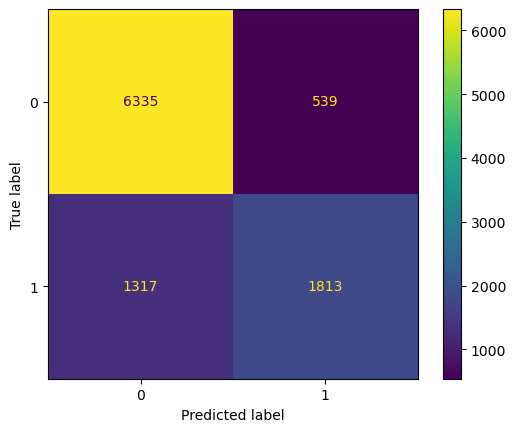

In [200]:
confusion = confusion_matrix(y_test, ypred)
cm=ConfusionMatrixDisplay(confusion)
cm.plot()
plt.show()

## Random forest 

In [490]:
# param_grid={'n_estimators':[50,100,200],
#           'min_samples_split':[2,4,6]}

In [356]:
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [None, 10, 20],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'bootstrap': [True, False]  
}

In [358]:
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10]
# }

In [360]:
gs=GridSearchCV(estimator=rfc,param_grid=param_grid,cv=4,scoring='accuracy',n_jobs=-1,refit = True)

In [362]:
gs.fit(X_train_smote,y_train_smote)

GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [363]:
gs.best_estimator_

RandomForestClassifier(bootstrap=False, min_samples_split=5, n_estimators=300)

In [364]:
gs.best_params_

{'bootstrap': False,
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 300}

In [365]:
gs.best_score_

0.9131940811306576

In [366]:
best_rf = gs.best_estimator_

In [367]:
ypred=best_rf.predict(X_test)

In [368]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      6874
           1       0.84      0.83      0.83      3130

    accuracy                           0.90     10004
   macro avg       0.88      0.88      0.88     10004
weighted avg       0.90      0.90      0.90     10004



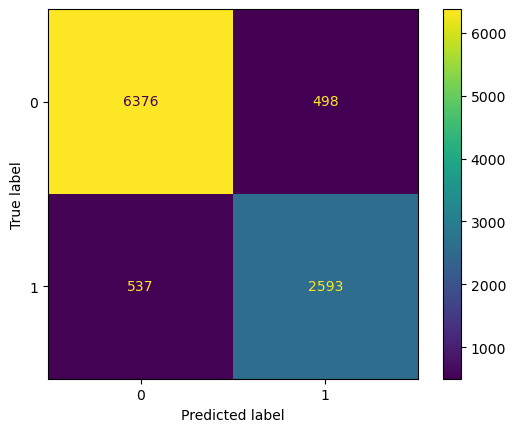

In [369]:
confusion = confusion_matrix(y_test, ypred)
cm=ConfusionMatrixDisplay(confusion)
cm.plot()
plt.show()

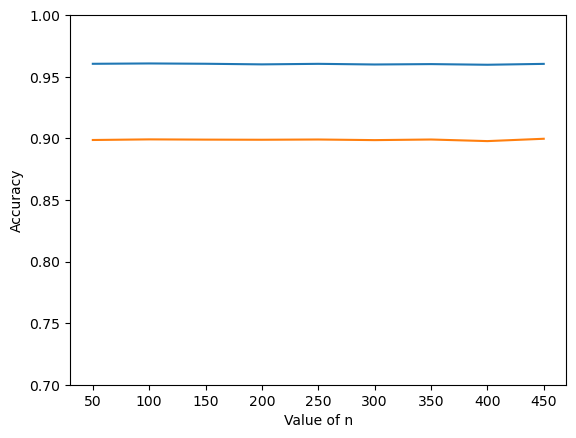

In [382]:
n_range = range(50, 500,50)
train_scores = []
test_scores = []
for n in n_range:
    rfc = RandomForestClassifier(bootstrap= False,max_depth= None,min_samples_leaf=1,min_samples_split= 5,n_estimators= 300)
    rfc.fit(X_train, y_train)
    train_scores.append(rfc.score(X_train_smote,y_train_smote))
    test_scores.append(rfc.score(X_test,y_test))

plt.plot(n_range, train_scores)
plt.plot(n_range, test_scores)
plt.xlabel('Value of n')
plt.ylabel('Accuracy')
plt.ylim(0.7,1)
plt.show()

### using step forward feature selection with random forest classifier 

In [159]:
rfc=RandomForestClassifier() 

In [165]:
type(fs_rfc)

tuple

In [167]:
fs=[i for i in fs_rfc]

In [169]:
fs

['car parking space',
 'lead time',
 'market segment type',
 'average price ',
 'special requests',
 'month',
 'day']

In [183]:
df_fs=X_train_smote[fs]

In [185]:
type(df_fs)

pandas.core.frame.DataFrame

In [187]:
df_fs.head()

,car parking space,lead time,market segment type,average price,special requests,month,day
0,0,2,4,81.0,0,1,20.0
1,0,183,4,110.0,1,9,8.0
2,0,7,4,130.0,2,8,20.0
3,0,40,3,85.0,0,10,25.0
4,0,2,4,67.7,0,1,14.0


In [189]:
rfc=RandomForestClassifier(min_samples_split=2, n_estimators= 200)

In [191]:
y_train_smote.shape

(32094,)

In [193]:
df_fs.shape

(32094, 7)

In [195]:
rfc.fit(df_fs,y_train_smote)

RandomForestClassifier(n_estimators=200)

In [196]:
test=X_test[fs]

In [197]:
ypred=rfc.predict(test)

In [201]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      6874
           1       0.81      0.83      0.82      3130

    accuracy                           0.89     10004
   macro avg       0.87      0.87      0.87     10004
weighted avg       0.89      0.89      0.89     10004



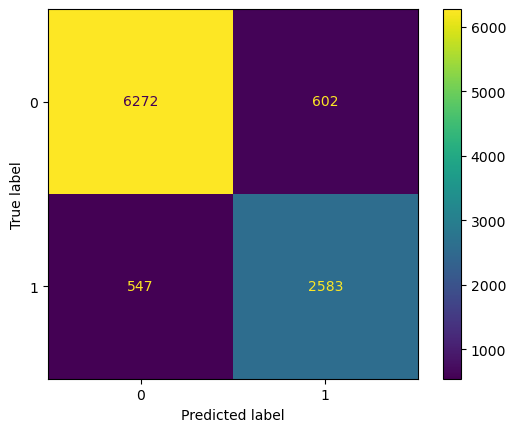

In [203]:
confusion = confusion_matrix(y_test, ypred)
cm=ConfusionMatrixDisplay(confusion)
cm.plot()
plt.show()

## using features extracted for randomforest (SelectFromModel)

In [257]:
rfc=RandomForestClassifier(n_estimators=200,) 

In [259]:
features_rfc

['lead time', 'average price ', 'special requests', 'month', 'day']

In [261]:
df_fs2=X_train[features_rfc]

In [263]:
rfc.fit(df_fs2,y_train)

RandomForestClassifier(n_estimators=200)

In [264]:
test=X_test[features_rfc]

In [265]:
ypred=rfc.predict(test)

In [269]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      6874
           1       0.84      0.75      0.79      3130

    accuracy                           0.88     10004
   macro avg       0.87      0.84      0.85     10004
weighted avg       0.88      0.88      0.88     10004



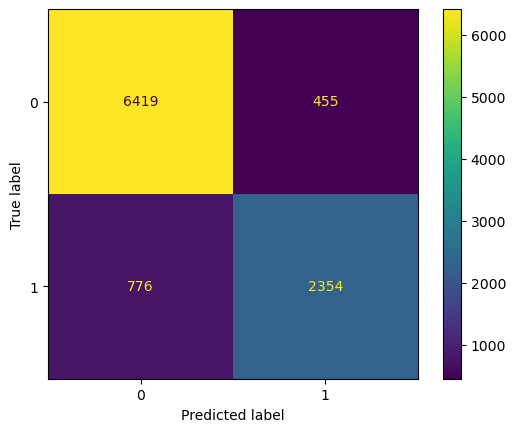

In [271]:
confusion = confusion_matrix(y_test, ypred)
cm=ConfusionMatrixDisplay(confusion)
cm.plot()
plt.show()

## testing rf feature selection with further hyperparamter tuning

In [385]:
rfc=RandomForestClassifier(bootstrap=False, min_samples_split=5, n_estimators=300, min_samples_leaf= 1,)

In [387]:
rfc.fit(df_fs2,y_train)

RandomForestClassifier(bootstrap=False, min_samples_split=5, n_estimators=300)

In [391]:
test=X_test[features_rfc]

In [393]:
ypred=rfc.predict(test)

In [395]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      6874
           1       0.83      0.76      0.79      3130

    accuracy                           0.88     10004
   macro avg       0.86      0.84      0.85     10004
weighted avg       0.88      0.88      0.88     10004



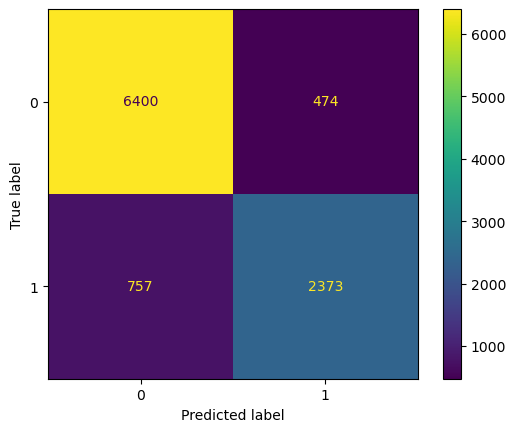

In [397]:
confusion = confusion_matrix(y_test, ypred)
cm=ConfusionMatrixDisplay(confusion)
cm.plot()
plt.show()

# XGboost

In [289]:
X_train_smote['day'] = X_train_smote['day'].astype(int)
X_train_smote['year'] = X_train_smote['year'].astype(int)


In [273]:
import xgboost as xgb

In [310]:
xgb_model=xgb.XGBRFClassifier(n_estimators=200,objective='binary:logistic',eval_metric=['mlogloss', 'merror'],max_depth=6)

In [312]:
xgb_model.fit(X_train_smote,y_train_smote)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=['mlogloss', 'merror'], feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=6, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=200, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=None, reg_alpha=None, ...)

In [313]:
X_test['day'] = X_test['day'].astype(int)
X_test['year'] = X_test['year'].astype(int)

In [314]:
ypred=xgb_model.predict(X_test)

In [318]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88      6874
           1       0.72      0.77      0.74      3130

    accuracy                           0.83     10004
   macro avg       0.81      0.82      0.81     10004
weighted avg       0.84      0.83      0.84     10004

